<a href="https://colab.research.google.com/github/luquelab/lab-data-science/blob/data-distribution/notebooks/generate_multimodal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating a multimodal data sample

## Description

This notebook generates a multimodal data sample. The user can define the properties of the multimodal distribution and the number of data points generated. This data is useful for validation of pipelines inferring the distribution of a data sample. The code outputs the data file and several figures.

## Quick-start guide
+ Go to the section [Input parameters](#scrollTo=Input_parameters) to define the paramaters for the multimodal distribution and the amount of data to be generated.
+ Run the notebook:
    + Manually clicking the tab `Runtime` --> `Run all` or cell by cell.
    + Using shortcut: `⌘/Ctrl+F9`
+ The notebook will attempt to download the saved files automatically. Depending on the browser, the user will be required to allow the download.
+ To visualize the generated distribution either open the downloaded files or go to the section [Plots](#scrollTo=Plots).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from google.colab import files
import os

## Input parameters
The user can define the characteristics of the multimodal data sample in the code cell below. The parameters include:
+ `x_range`: Tuple indicating the range of values for the data sample. Example: `x_range =  (12,53)`.
+ `n_modes`: Integer defining the number of modes in the distribution. Example: `n_modes = 3`.
+ `mode_locations`: List providing the locations of each mode. Example: `mode_locations = [17,25,45]`.
+ `mode_std`: List providing the standard deviations for each mode. Example: `mode_std = [3,5,7]`.
+ `mode_intensities`: List providing the relative intensities of each mode. Example `mode_intensities = [5,20,1]`.
+ `n_data`: Integer defining the amount of points to generate following the distribution. Example `n_data = 1000`.


In [2]:
# Set parameters
x_range = (12,53)
n_modes = 3
mode_locations = [16,25,45]
mode_std = [3,5,7]
mode_intensities = [7,20,2]
n_data = 1000

# Code
Section containing the main body of the code.

## Definitions

In [3]:
# Class Modes
### This class defines an object that contains the main parameters defining a multimodal distribution
class Modes:
    def __init__(self, n_modes, mode_locations, mode_std, mode_intensities):
        self.n_modes = n_modes
        self.mode_locations = mode_locations
        self.mode_std = mode_std
        self.mode_intensities = mode_intensities


In [4]:
# Function
## This function prints the attributes of an object without knowing the name
## of the attributes in advance.
def print_attributes(obj):
  """Prints all attributes of an object.

  Args:
    obj: The object whose attributes you want to print.
  """
  for attr in dir(obj):
    if not attr.startswith("__"):  # Exclude special attributes
      value = getattr(obj, attr)
      print(f"{attr}: {value}")

## Example
# my_object = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])
# print_attributes(my_object)

In [5]:
# Function
## This function generates the multimodal distribution.
def multimodal_distribution(x_range, modes,n_data):
    """
    Generates a multimodal distribution by combining normal distributions.

    Args:
        x_range (tuple): Range of x-values for the distribution (min, max).
        modes (Modes): Object containing mode information.
        n_data (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated distribution.
    """

    # Set range and data points stochastically.
    x = np.linspace(x_range[0], x_range[1], n_data)
    distribution = np.zeros_like(x, dtype=float)

    # Generate normal distributions for each mode
    for i in range(modes.n_modes):

        mode_location = modes.mode_locations[i]
        mode_distribution = modes.mode_intensities[i] * np.exp(-0.5 * ((x - mode_location) / modes.mode_std[i])**2)

        # Add to the overall distribution
        distribution += mode_distribution

    return distribution

## Example
# modes = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])

In [6]:
# This function generates the data points for a distribution
def generate_data_points(distribution, x_range, num_points):
    """
    Generates data points based on the given distribution.

    Args:
        distribution (numpy.ndarray): The probability distribution.
        x_range (tuple): Range of x-values for the distribution (min, max).
        num_points (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated data points.
    """

    x = np.linspace(x_range[0], x_range[1], num_points)
    cdf = np.cumsum(distribution)  # Calculate cumulative distribution function
    cdf /= cdf[-1]  # Normalize CDF to range [0, 1]

    random_numbers = np.random.rand(num_points)
    data_points = np.interp(random_numbers, cdf, x)  # Inverse transform sampling

    return data_points

In [7]:
# Function
## This function generates a list with the names of the generated files.

def add_filenames(directory="."):
  """
  Adds the names of all files in the specified directory to a list.

  Args:
      directory: The directory to search for files. Defaults to the current directory.

  Returns:
      A list of filenames in the directory. Returns an empty list if the directory is invalid.
  """

  filenames = []
  if os.path.isdir(directory):
    for filename in os.listdir(directory):
      if os.path.isfile(os.path.join(directory, filename)):
        filenames.append(filename)
  return filenames

# Example usage
# generated_files = add_filenames()  # Get files from the current directory
# generated_files

# Example usage to get files from a specific directory
# generated_files_specific_dir = add_filenames("/content/my_directory")  # Replace with the actual path
# print(generated_files_specific_dir)


## Distribution

In [8]:
# Generte multimodal distribution
modes = Modes(n_modes, mode_locations, mode_std, mode_intensities)
distribution = multimodal_distribution(x_range, modes,n_data)

## Data sample

In [9]:
# Generate data points
num_points = n_data
data_points = generate_data_points(distribution, x_range, num_points)


In [10]:
# Save data in a CSV file
with open('data_sample.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['data_point'])  # Write header
    for point in data_points:
        writer.writerow([point])

# Outputs

This section contain the main outputs of the notebook and download the files.

Some of the outputs may have been generated throughout the [Code](#scrollTo=Code) section.

## Plots

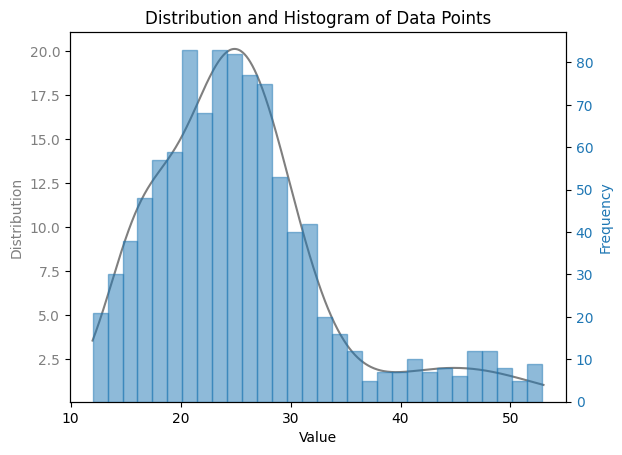

In [11]:
# prompt: Plot the distribution in the y1-axis and the histogram of the data sampled on the y2-axis

import matplotlib.pyplot as plt

# Assuming 'data_points' and 'distribution' are already defined from the previous code
# and 'x' is the x-axis values for the distribution

x = np.linspace(x_range[0], x_range[1], n_data) # Define x based on your data

fig, ax1 = plt.subplots()

# Plot the distribution on the first y-axis (y1)
color = 'tab:gray'
ax1.plot(x, distribution, color=color, label= 'Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Distribution', color=color)
ax1.tick_params(axis='y', labelcolor=color)
#plt.legend()

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the histogram of the data on the second y-axis (y2)
color = 'tab:blue'
color_edge = 'tab:blue'
ax2.hist(data_points, bins=30, color=color, edgecolor = color_edge, alpha=0.5, label='Histogram') # Adjust bins as needed
ax2.set_ylabel('Frequency', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Distribution and Histogram of Data Points')
#plt.legend()

# Save plot in multiple formats
plt.savefig('distribution_histogram.pdf')
plt.savefig('distribution_histogram.png')

# Show plot
plt.show()



## Download files


In [12]:
# Download the generated files
generated_files = add_filenames()
for file in generated_files:
  files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>